# Fundamental Concepts Review

Importing necessary libraries and loading the example dataset. 

This fictitious dataset contains the average height (in centimeters) of undergrad students, as well as categorical information about age and if they drink coffee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.titleweight']= 'bold'

np.random.seed(42)

df_full = pd.read_csv('undergrad_students.csv')
df_full.head(3)

,user_id,age,drinks_coffee,height
0,4509,<21,False,163.93
1,1864,>=21,True,167.19
2,2060,<21,False,181.15


## Law of Large Numbers
>Bigger sample size will result in a *statistic* that more closely represents the Population *parameter*.

This can be demonstrated by comparing the Population Parameter - average height ($\mu$) - against the Sample Statistic - average height $\bar X$.

Let's assume:
+ the full dataset, `df_full`, represents the Population.
+  different samples, randomly selected from the full dataset, using specific sample sizes.

In [181]:
population_mean = df_full.height.mean()

print(f'Population Avg Height: {population_mean:.3f} cm')
print(f'Population Size: {len(df_full):,}')

Population Avg Height: 171.698 cm
Population Size: 2,974


In [4]:
# Different sizes, from 3 to 2974, with increments of 10
sizes = range(3,len(df_full),10)

# Random sampling, for all different sample sizes
avg_heights = [df_full.sample(size).height.mean() for size in sizes]

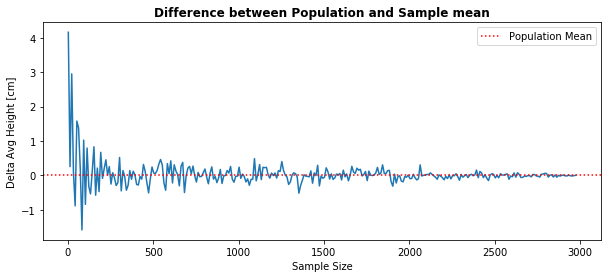

In [5]:
# Plotting
plt.figure(figsize=(10,4))
plt.plot(sizes, population_mean - avg_heights)
plt.axhline(0, color='r', linestyle=':', label='Population Mean')
plt.title('Difference between Population and Sample mean')
plt.xlabel('Sample Size')
plt.ylabel('Delta Avg Height [cm]')
plt.legend();

As stated on the **Law of Large Numbers**, we verify that larger samples yield an estimated statistic closer to the "actual value" (population parameter). That is, the difference between the Population and Sample average height converges to zero.

# Central Limit Theory
>With a large enough sample size, the sampling distribution of specific statistics will be normally distributed around the mean value.

This applies to some, but not all statistics: mean, proportion, difference in means, difference in proportions.

Similar to what we have done before, this can be demonstrated by generating sampling distributions based on different sample sizes. 

But first, what is  a "sampling distribution" and how can we obtain one?

+ **Sampling Distribution**: shows the frequency of every possible result a statistic can take in *every* possible sample from a population.

+ **Bootstrapping**: Estimate the Sampling Distribution of any statistic by constructing a number of resamples with replacement of the observed dataset (and of equal size to the observed dataset).

It will make more sense once put in practice:

In [134]:
# From the original dataset, take a small sample of size 50
df_sample_50 = df_full.sample(50)

# Generate Sampling Distribution with 100 resamples
resampling_100 = np.random.choice(df_sample_50.height, (100, 50)).mean(axis=1)

# Generate Sampling Distribution with 1,000 resamples
resampling_1000 = np.random.choice(df_sample_50.height, (1_000, 50)).mean(axis=1)

# Generate Sampling Distribution with 10,000 resamples
resampling_10000 = np.random.choice(df_sample_50.height, (10_000, 50)).mean(axis=1)

# Generate Sampling Distribution with 80,000 resamples
resampling_80000 = np.random.choice(df_sample_50.height, (80_000, 50)).mean(axis=1)

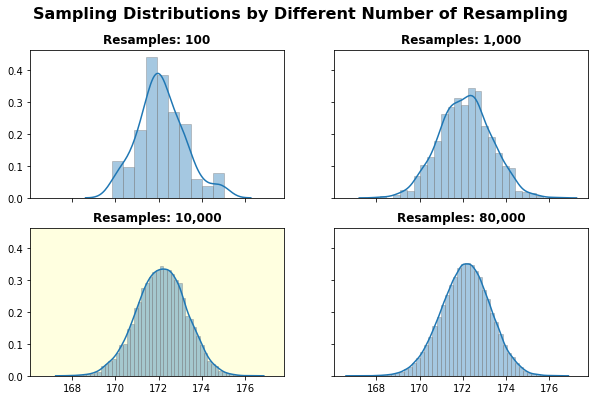

In [146]:
# Plotting it all together, with same x and y axis
fig, axes = plt.subplots(2,2, sharey=True, sharex=True, figsize=(10,6))
fig.suptitle('Sampling Distributions by Different Number of Resampling',
            fontweight='bold', fontsize=16)

sns.distplot(resampling_100, ax=axes[0,0], hist_kws={'edgecolor':'gray'})
axes[0,0].set_title('Resamples: 100')

sns.distplot(resampling_1000, ax=axes[0,1], hist_kws={'edgecolor':'gray'})
axes[0,1].set_title('Resamples: 1,000')

sns.distplot(resampling_10000, ax=axes[1,0], hist_kws={'edgecolor':'gray'})
axes[1,0].set_title('Resamples: 10,000')
axes[1,0].set_facecolor('lightyellow') # Highlighting

sns.distplot(resampling_80000, ax=axes[1,1], hist_kws={'edgecolor':'gray'})
axes[1,1].set_title('Resamples: 80,000');

As stated by the **Central Limit Theory**, we can verify that a larger amount of resampling will indeed lead to a normal distribution, centered around the mean value. As a matter of fact, the highlighted plot - with *10,000 repetitions* - seems to result in a "good enough" normal.

## Law of Large Numbers + Central Limit Theory
We just verified that 10,000 resampling yields a "good enough" normal distribution. It is only natural now to combine the best of both concepts, having a normal distribution based on a sample "big enough" to result in an accurate estimator for the Population Parameter.

Let's investigate this by replicating the 10,000 resampling based on initial samples of different sizes:

In [157]:
# From the original dataset, take different sample sizes
df_sample_50 = df_full.sample(50)
df_sample_100 = df_full.sample(100)
df_sample_200 = df_full.sample(200)
df_sample_1000 = df_full.sample(1000)

# Bootstrap for each sample, replicating 10,000 times
bootstrap_50   = np.random.choice(df_sample_50.height,   (10_000, 50)).mean(axis=1)
bootstrap_100  = np.random.choice(df_sample_100.height,  (10_000, 100)).mean(axis=1)
bootstrap_200  = np.random.choice(df_sample_200.height,  (10_000, 200)).mean(axis=1)
bootstrap_1000 = np.random.choice(df_sample_1000.height, (10_000, 1000)).mean(axis=1)

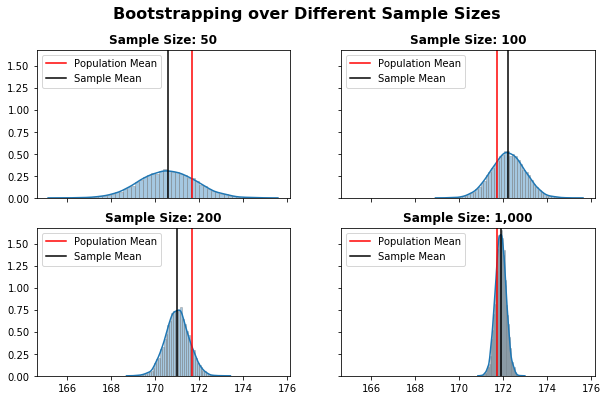

In [180]:
# Plotting it all together, with same x and y axis
fig, axes = plt.subplots(2,2, sharey=True, sharex=True, figsize=(10,6))
fig.suptitle('Bootstrapping over Different Sample Sizes',
            fontweight='bold', fontsize=16)

sns.distplot(bootstrap_50, ax=axes[0,0], hist_kws={'edgecolor':'gray'})
axes[0,0].set_title('Sample Size: 50')
axes[0,0].axvline(population_mean, color='r', label='Population Mean')
axes[0,0].axvline(bootstrap_50.mean(), color='k', label='Sample Mean')
axes[0,0].legend()

sns.distplot(bootstrap_100, ax=axes[0,1], hist_kws={'edgecolor':'gray'})
axes[0,1].set_title('Sample Size: 100')
axes[0,1].axvline(population_mean, color='r', label='Population Mean')
axes[0,1].axvline(bootstrap_100.mean(), color='k', label='Sample Mean')
axes[0,1].legend()

sns.distplot(bootstrap_200, ax=axes[1,0], hist_kws={'edgecolor':'gray'})
axes[1,0].set_title('Sample Size: 200')
axes[1,0].axvline(population_mean, color='r', label='Population Mean')
axes[1,0].axvline(bootstrap_200.mean(), color='k', label='Sample Mean')
axes[1,0].legend()
# axes[1,0].set_facecolor('lightyellow') # Highlighting

sns.distplot(bootstrap_1000, ax=axes[1,1], hist_kws={'edgecolor':'gray'})
axes[1,1].set_title('Sample Size: 1,000')
axes[1,1].axvline(population_mean, color='r', label='Population Mean')
axes[1,1].axvline(bootstrap_1000.mean(), color='k', label='Sample Mean')
axes[1,1].legend();

As expected, with 10,000 resamples the **Central Limit Theory** "kicks-in", resulting in Normally Distributed sampling distributions.

Also, due to the **Law of Large Numbers**, larger sample sizes results in a more accurate estimate of the Population Parameter. We can see that, as the sample size increases:
+ the difference between the means decrease
+ the Confidence Interval width decrease

Meaning we become more confident of estimating the correct value.

> **Main Takeaway**: by combining both concepts, we can obtain a pretty accurate estimate of the population parameter - even based on a small sample size, such as 200 observations. As long as we resample it 10,000 times.

Hence, these are the reference values arbitrarily specified for our practical approach of inferential statistics, both for Confidence Interval and Hypothesis Testing.

In [ ]:
# sampling_100 =[]
# for _ in range(1_000):
#     boot_sample = df_sample_100.sample(100, replace=True)
#     avg_height = boot_sample.height.mean()
#     sampling_100.append(avg_height)
# # Plotting
# sns.distplot(sampling_100);

# TODO: stopped here

`1.` We are interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers.

$$ Height_{Coffee} = Height_{No \space Coffee} $$

Which can be rewritten as:<br>
The difference between the average height of Coffee drinkers and No Coffee drinker is equal to zero.

$$ Height_{Coffee} - Height_{No \space Coffee} = 0$$

First, let's create a sample of size 200 from our full dataset.

We will call it the "*Original Sample*":

In [10]:
df_sample_200 = df_full.sample(200)
df_sample.head(3)

NameError: name 'df_sample' is not defined

## Bootstrap
Using the Bootstrapping technique, we will generate a new sample of size 200, by drawing 200 random observation from the *original sample* - with replacement.

Then, we calculate the mean height for coffee drinkers and non-coffee drinkers. Lastly, we compute the difference in means for each new sample randomly generated, storing it in a list called `diffs`.

We repeat this process 10,000 times, in order to make sure the Central Limit Theory "kicks in", resulting in a sampling distribution normally distributed.

>**Note**: we will have three arrays at the end of the iterations - one for each mean and one for the difference in means. Each array is of size 10,000.

In [ ]:
# instantiate empty list
diffs = []
for _ in range(10000):
    boot_sample = df_sample_200.sample(200, replace=True)
    boot_h_c = boot_sample.query('drinks_coffee == True').height.mean()
    boot_h_not_c = boot_sample.query('drinks_coffee == False').height.mean()
    diffs.append(boot_h_c - boot_h_not_c)

In [ ]:
print(f'Sampling Distribution Mean: {np.mean(diffs):.3f}')
print(f'Sampling Distribution Std: {np.std(diffs):.3f}')

In [ ]:
height_coffee = df_sample.query('drinks_coffee == True').height
height_no_coffee = df_sample.query('drinks_coffee == False').height

actual_mean_difference = height_coffee.mean() - height_no_coffee.mean()
print(f'Original Sample Mean Height Difference: {actual_mean_difference:.3f}')

Checking the difference between the average height of both groups, we can see the mean of our Sampling Distribution (1.332) closely approximates the actual mean difference observed in the original sample (1.335).

## Confidence Interval
Let's find the lower and upper bounds of the interval containing the correct parameter with a confidence level of 95%:
$\alpha = 0.05$

In [ ]:
lower, upper = np.percentile(diffs, 2.5) , np.percentile(diffs, 97.5)
print(f'Confidence Interval: [{lower:.2f}, {upper:.2f}]')

In [ ]:
plt.hist(diffs);
plt.title('Sampling Distribution: Difference in Average Height')
plt.xlabel('height difference [inches]')
plt.ylabel('Frequency');
plt.axvline(lower, color='r')
plt.axvline(upper, color='r');

In [ ]:
boot_height_coffee = np.random.choice(height_coffee, (10000, 200)).mean(axis=1)
boot_height_no_coffee = np.random.choice(height_no_coffee, (10000, 200)).mean(axis=1)

delta_height = boot_height_coffee - boot_height_no_coffee

In [ ]:
boot_height_coffee.std() , boot_height_no_coffee.std(), delta_height.std()

## Simulating from the Null
Based on the standard deviation of the Sampling Distribution of the difference of means (average height), we can simulate a normal distribution based on the mean value stated by the Null hypotheses: 0

In [ ]:
null_mean = 0
plt.hist(np.random.normal(null_mean, delta_height.std(), 10000));

# Using the typical way

As we can see, the second method takes longer and presents a bigger standard deviation. Which will affect the results!

In the first method we are filtering the groups and then bootstrapping the average height with 200 sample size. That is, we are using the exact same amount of height for each group. Which, by the Law of Large Numbers, will result in a more accurate estimation for the parameter.

But we do not want that, since our original sample actually is unbalanced. Therefore, we also want to capture this characteristic from the original sample, which will lead to a wide confidence interval.

`4.` Now, use your observed sampling distribution for the difference in means to simulate what you would expect the sampling distribution to be if the null hypothesis is true. 

You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`.

## Simulating from the Null
Based on the standard deviation of the Sampling Distribution of the difference of means (average height), we can simulate a normal distribution based on the mean value stated by the Null hypotheses: 0

In [ ]:
sim_null = np.random.normal(null_mean,np.std(diffs), 10000)

In [ ]:
# plotting the Normal Distribution from the Null
plt.hist(sim_null);
plt.title('Expected Distribution, assuming Null to be True')
plt.xlabel('height difference [inches]')
plt.ylabel('Frequency');

# plotting the CI
plt.axvline(lower, color='r')
plt.axvline(upper, color='r');